# Importing data and preliminary dataset check
The main goal of this work is to evaluate the performance of multiple non-linear regression techniques,
such as Support-vector regression (SVR), K-nearest neighbor (KNN), Random Forest
Regressor, Gradient Boosting, and XGBOOST for COVID-19 reproduction rate
prediction and to study the impact of feature selection algorithms and hyperparameter
tuning on prediction.

In [1]:
%run setup.ipynb

In [2]:
dati_paese_data2 = pd.read_csv('owid-covid-data.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'owid-covid-data.csv'

In [4]:
dati_paese_data2

iso_code continent     location        date  total_cases  new_cases  \
0           AFG      Asia  Afghanistan  2020-02-24          5.0        5.0   
1           AFG      Asia  Afghanistan  2020-02-25          5.0        0.0   
2           AFG      Asia  Afghanistan  2020-02-26          5.0        0.0   
3           AFG      Asia  Afghanistan  2020-02-27          5.0        0.0   
4           AFG      Asia  Afghanistan  2020-02-28          5.0        0.0   
...         ...       ...          ...         ...          ...        ...   
157931      ZWE    Africa     Zimbabwe  2022-01-24     228541.0      287.0   
157932      ZWE    Africa     Zimbabwe  2022-01-25     228776.0      235.0   
157933      ZWE    Africa     Zimbabwe  2022-01-26     228943.0      167.0   
157934      ZWE    Africa     Zimbabwe  2022-01-27     229096.0      153.0   
157935      ZWE    Africa     Zimbabwe  2022-01-28     229333.0      237.0   

        new_cases_smoothed  total_deaths  new_deaths  new_deaths_smoothed  \
0                      NaN           NaN         NaN                  NaN   
1                      NaN           NaN         NaN                  NaN   
2                      NaN           NaN         NaN                  NaN   
3                      NaN           NaN         NaN                  NaN   
4                      NaN           NaN         NaN                  NaN   
...                    ...           ...         ...                  ...   
157931             297.286        5305.0        11.0                6.714   
157932             330.857        5316.0        11.0                8.286   
157933             293.714        5321.0         5.0                7.857   
157934             220.571        5324.0         3.0                6.857   
157935             196.000        5333.0         9.0                6.429   

        ...  female_smokers  male_smokers  handwashing_facilities  \
0       ...             NaN           NaN                  37.746   
1       ...             NaN           NaN                  37.746   
2       ...             NaN           NaN                  37.746   
3       ...             NaN           NaN                  37.746   
4       ...             NaN           NaN                  37.746   
...     ...             ...           ...                     ...   
157931  ...             1.6          30.7                  36.791   
157932  ...             1.6          30.7                  36.791   
157933  ...             1.6          30.7                  36.791   
157934  ...             1.6          30.7                  36.791   
157935  ...             1.6          30.7                  36.791   

        hospital_beds_per_thousand  life_expectancy  human_development_index  \
0                              0.5            64.83                    0.511   
1                              0.5            64.83                    0.511   
2                              0.5            64.83                    0.511   
3                              0.5            64.83                    0.511   
4                              0.5            64.83                    0.511   
...                            ...              ...                      ...   
157931                         1.7            61.49                    0.571   
157932                         1.7            61.49                    0.571   
157933                         1.7            61.49                    0.571   
157934                         1.7            61.49                    0.571   
157935                         1.7            61.49                    0.571   

        excess_mortality_cumulative_absolute  excess_mortality_cumulative  \
0                                        NaN                          NaN   
1                                        NaN                          NaN   
2                                        NaN                          NaN   
3                                        NaN   

In [5]:
dati_paese_data2=dati_paese_data2[['iso_code','date','reproduction_rate','total_cases', 'new_cases', 'total_deaths',
                  'new_deaths', 'total_cases_per_million', 'new_cases_per_million',
                  'total_deaths_per_million','new_deaths_per_million','new_tests','total_tests',
                  'total_tests_per_thousand','new_tests_per_thousand','positive_rate','tests_per_case',
                  'stringency_index', 'population_density']]
dat = (dati_paese_data2['date'] >= '2020-04-01') & (dati_paese_data2['date'] <= '2021-03-10')
dataset=dati_paese_data2.loc[dat]
dataset=dataset.drop(columns=["iso_code", "date"])
dataset=dataset.fillna(dataset.mean())
dataset.reset_index(inplace = True,drop = True)
dataset.to_csv(DATA_PATH+'/dataset.csv')

In [6]:
print(dataset.shape)
print(dataset)
print(dataset.info())

(75529, 17)
       reproduction_rate  total_cases  new_cases  total_deaths  new_deaths  \
0                   1.51        192.0       26.0           4.0         0.0   
1                   1.51        235.0       43.0           4.0         0.0   
2                   1.50        269.0       34.0           5.0         1.0   
3                   1.49        270.0        1.0           5.0         0.0   
4                   1.49        299.0       29.0           7.0         2.0   
...                  ...          ...        ...           ...         ...   
75524               0.64      36260.0       12.0        1485.0         1.0   
75525               0.68      36271.0       11.0        1485.0         0.0   
75526               0.70      36289.0       18.0        1487.0         2.0   
75527               0.73      36321.0       32.0        1489.0         2.0   
75528               0.76      36341.0       20.0        1489.0         0.0   

       total_cases_per_million  new_cases_per_milli

16 features were used to predict the reproduction rate of COVID-19: Total_cases, New_cases, Total_deaths,
New_deaths, Total_cases_per_million, New_cases_per_million,
Total_deaths_per_million, New_deaths_per_million,
New_tests, Total_tests, Total_tests_per_thousand,
New_tests_per_thousand, Positive_rate, Tests_per_case,
Stringency_index, Population_density

# Corelation analysis

We notice a very low correlation between most variables except for Total_cases, New_cases, Total_deaths,
New_deaths that are higly positively correlated.

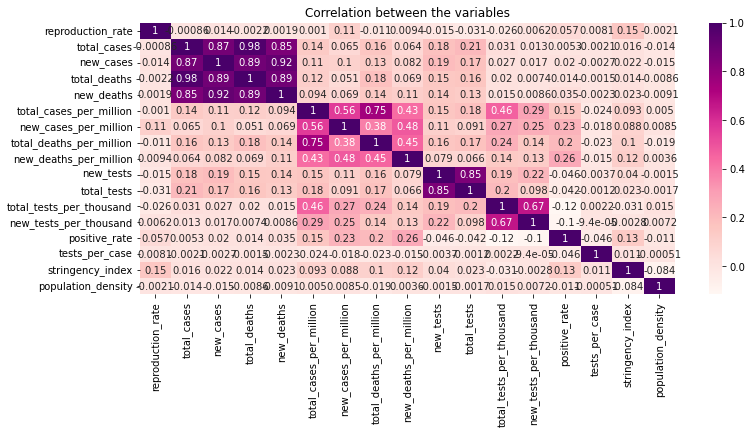

In [7]:
plt.figure(figsize=(12,5))
correlation=dataset.corr()
sns.heatmap(correlation,annot=True,cmap='RdPu')
plt.title('Correlation between the variables')
plt.savefig(IMAGES_PATH+"/Corr1.jpg",bbox_inches ="tight",pad_inches=1.5,facecolor="white")

# Preliminary analysis

In [13]:
print(dataset.describe())

       reproduction_rate   total_cases      new_cases  total_deaths  \
count       75529.000000  7.552900e+04   75529.000000  7.552900e+04   
mean            1.001492  8.168568e+05    6510.021495  2.484978e+04   
std             0.284428  5.004661e+06   36239.464681  1.190491e+05   
min            -0.020000  1.000000e+00  -74347.000000  1.000000e+00   
25%             0.910000  7.130000e+02       1.000000  4.600000e+01   
50%             1.001492  7.918000e+03      53.000000  4.320000e+02   
75%             1.120000  9.064800e+04     698.000000  9.707000e+03   
max             3.610000  1.185171e+08  892302.000000  2.702341e+06   

         new_deaths  total_cases_per_million  new_cases_per_million  \
count  75529.000000             75529.000000           75529.000000   
mean     168.031030              8099.841452              70.361740   
std      768.548105             15476.399568             182.713192   
min    -1918.000000                 0.033000           -2123.457000   
25%  

## Training and Testing sets

Training and testing sets were splitted randomly using the proportions indicated by the paper. We consider 244 days for the training set and 100 days for the testing set. According to this we chose test_size=0.29.

In [6]:
Y = dataset['reproduction_rate']
X = dataset.drop('reproduction_rate', axis = 1)
test_size = 0.29
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size, random_state=42)
X_train.to_csv(DATA_PATH+'/X_train.csv')
X_test.to_csv(DATA_PATH+'/X_test.csv')
pd.DataFrame(Y_train).to_csv(DATA_PATH+'/Y_train.csv')
pd.DataFrame(Y_test).to_csv(DATA_PATH+'/Y_test.csv')

# Non-linear regression techniques

## Random Forest

Random forest is an ensemble learning method for regression that operates by constructing a multitude of decision trees at training time. Ensemble learning method is a technique that combines predictions from multiple machine learning algoritms to make a more accurate prediction than a single model.
The random forest fits a number of classifying decision trees on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting. The sub-sample size is controlled with the max_samples parameter if bootstrap=True (default), otherwise the whole dataset is used to build each tree. 

## Random Forest without feature selection and without hyperparameter 

We create the model with 100 trees, the out-of-bag samples(row which will not be used as the training data) are used to estimate the generalization score, all processors are used, bootstrap samples are used when building trees, the  randomness of the bootstrapping of the samples used when building trees (if bootstrap=True) and the sampling of the features to consider when looking for the best split at each node is controlled with random_state=42.

In [7]:
rf = RandomForestRegressor(n_estimators = 100, n_jobs = (-1), oob_score = True, bootstrap = True, random_state = 42)
rf.fit(X_train, Y_train)

RandomForestRegressor(n_jobs=-1, oob_score=True, random_state=42)

In [8]:
Y_pred_rf= rf.predict(X_test)
pd.DataFrame(Y_pred_rf).to_csv(RESULTS_PATH+'/Y_pred_rf_1.csv')

The performance of reproduction rate prediction is measured
by mean absolute error (MAE), mean squared error (MSE), root mean squared error
(RMSE), R-Squared, relative absolute error (RAE), and root relative squared error (RRSE)
metrics.

In [9]:
MSE_rf=mean_squared_error(Y_test, Y_pred_rf)
print(MSE_rf)

0.007404174036124737


In [10]:
R2_rf=r2_score(Y_test, Y_pred_rf)
print(R2_rf)

0.9095047116838907


In [11]:
RMSE_rf = np.sqrt(mean_squared_error(Y_test, Y_pred_rf))
print(RMSE_rf)

0.08604751034239595


In [12]:
MAE_rf=mean_absolute_error(Y_test, Y_pred_rf)
print(MAE_rf)

0.041432501044154475


In [13]:
RAE_rf=RAE(Y_test, Y_pred_rf)
print(RAE_rf)

0.08270593961582381


In [14]:
RRSE_rf=RRSE(Y_test, Y_pred_rf)
print(RRSE_rf)

0.3008243479442821


## Gradient Boosting 

Gradient Boosting algorithm is used to generate an ensemble model by combining the weak learners or weak predictive models, tipically decision trees.
It allows for the optimization of arbitrary differentiable loss functions. In each stage a regression tree is fit on the negative gradient of the given loss function.
Boosting is a strong alternative to bagging. Instead of aggregating predictions, boosters turn weak learners into strong learners by focusing on where the individual models (usually Decision Trees) went wrong. In Gradient Boosting, individual models train upon the residuals, the difference between the prediction and the actual results. Instead of aggregating trees, gradient boosted trees learns from errors during each boosting round.

## Gradient Boosting without feature selection and without hyperparameter 

We create a model with 500 trees(boosting stages), each of which has max depth 4, with minimum number of samples required to split an internal node equal to 5.
As criterion parameter (function to measure the quality of a split) we use the default value of “friedman_mse” since it's generally the best as it can provide a better approximation in some cases.

In [24]:
gbr_params = {'n_estimators': 500,
          'max_depth': 4,
          'min_samples_split': 5,
          'learning_rate': 0.01,
          'loss': 'ls'}
gbr = GradientBoostingRegressor(**gbr_params)
gbr.fit(X_train, Y_train)

GradientBoostingRegressor(learning_rate=0.01, max_depth=4, min_samples_split=5,
                          n_estimators=500)

In [25]:
Y_pred_gbr = gbr.predict(X_test)
pd.DataFrame(Y_pred_gbr).to_csv(RESULTS_PATH+'/Y_pred_gbr_1.csv')

In [26]:
MSE_gbr=mean_squared_error(Y_test, Y_pred_gbr)
print(MSE_gbr)

0.04357501098989848


In [27]:
R2_gbr=r2_score(Y_test, Y_pred_gbr)
print(R2_gbr)

0.46741754533738755


In [28]:
RMSE_gbr = np.sqrt(mean_squared_error(Y_test, Y_pred_gbr))
print(RMSE_gbr)

0.20874628377506144


In [29]:
MAE_gbr=mean_absolute_error(Y_test, Y_pred_gbr)
print(MAE_gbr)

0.14251619062055454


In [30]:
RAE_gbr=RAE(Y_test, Y_pred_gbr)
print(RAE_gbr)

0.20063982644273728


In [31]:
RRSE_gbr=RRSE(Y_test, Y_pred_gbr)
print(RRSE_gbr)

0.7297824707833005


## XGboost

XGBoost is short for “eXtreme Gradient Boosting.” The “eXtreme” refers to speed enhancements such as parallel computing and cache awareness that makes XGBoost approximately 10 times faster than traditional Gradient Boosting. In addition, XGBoost includes a unique split-finding algorithm to optimize trees, along with built-in regularization that reduces overfitting. Generally speaking, XGBoost is a faster, more accurate version of Gradient Boosting.

## XGboost without feature selection and without hyperparameter 

We create the model with 100 trees

In [16]:
xgboost = xgb.XGBRegressor(n_estimators=100)
xgboost.fit(X_train, Y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [17]:
Y_pred_xgboost = xgboost.predict(X_test)
pd.DataFrame(Y_pred_xgboost).to_csv(RESULTS_PATH+'/Y_pred_xgboost_2.csv')

In [18]:
MSE_xgboost=mean_squared_error(Y_test, Y_pred_xgboost)
print(MSE_xgboost)

0.01455148974454276


In [19]:
R2_xgboost=r2_score(Y_test, Y_pred_xgboost)
print(R2_xgboost)

0.8221487969574355


In [20]:
RMSE_xgboost = np.sqrt(mean_squared_error(Y_test, Y_pred_xgboost))
print(RMSE_xgboost)

0.12062955584989427


In [21]:
MAE_xgboost=mean_absolute_error(Y_test, Y_pred_xgboost)
print(MAE_xgboost)

0.0779643747573597


In [22]:
RAE_xgboost=RAE(Y_test, Y_pred_xgboost)
print(RAE_xgboost)

0.11594502528086935


In [23]:
RRSE_xgboost=RRSE(Y_test, Y_pred_xgboost)
print(RRSE_xgboost)

0.4217240840200494


## k-nearest neighbor

The k-nearest neighbors (KNN) algorithm is a simple, easy-to-implement supervised machine learning algorithm that can be used to solve both classification and regression problems. It recognizes patterns based on proximity of the data.

##  K-nearest neighbor without feature selection and without hyperparameter 

We create a model that considers 7 neighbors for KNeighbor queries and weights parameter as default uniform.

In [32]:
knn = KNeighborsRegressor(n_neighbors=7)
knn.fit(X_train, Y_train)

KNeighborsRegressor(n_neighbors=7)

In [33]:
Y_pred_knn = knn.predict(X_test)
pd.DataFrame(Y_pred_knn).to_csv(RESULTS_PATH+'/Y_pred_knn_1.csv')

In [34]:
MSE_knn=mean_squared_error(Y_test, Y_pred_knn)
print(MSE_knn)

0.03183175026635022


In [35]:
R2_knn=r2_score(Y_test, Y_pred_knn)
print(R2_knn)

0.6109460145175843


In [36]:
RMSE_knn = np.sqrt(mean_squared_error(Y_test, Y_pred_knn))
print(RMSE_knn)

0.1784145461176028


In [37]:
MAE_knn=mean_absolute_error(Y_test, Y_pred_knn)
print(MAE_knn)

0.09870194045941104


In [38]:
RAE_knn=RAE(Y_test, Y_pred_knn)
print(RAE_knn)

0.1714859920882163


In [39]:
RRSE_knn=RRSE(Y_test, Y_pred_knn)
print(RRSE_knn)

0.6237419221780536


## Support-vector regression 

Support-vector machine is a supervised machine learning algorithm. It constructs a hyperplane or set of hyperplanes in a high- or infinite-dimensional space, which can be used for classification and regression. A good separation is achieved by the hyperplane that has the largest distance to the nearest training-data point of any class (so-called functional margin), since in general the larger the margin, the lower the generalization error of the classifier.
It tries to find a line/hyperplane (in multidimensional space) that separates these two classes. Then it classifies the new point depending on whether it lies on the positive or negative side of the hyperplane depending on the classes to predict.

## Support-vector regression without feature selection and without hyperparameter 

We create a model with kernel type to be used in the algorithm equal to ‘rbf’.
Support Vector Machine algorithms are not scale invariant therefor we imported StandardScaler from sklearn.preprocessing to scale our data.

In [7]:
svr = SVR(kernel = 'rbf')

In [8]:
sc_X = StandardScaler()
sc_y = StandardScaler()
X_train_std = sc_X.fit_transform(X_train)
Y_train_std = sc_y.fit_transform(Y_train.values.reshape(-1,1))
X_test_std = sc_X.fit_transform(X_test)

In [9]:
svr.fit(X_train_std, np.ravel(Y_train_std))
y_pred = svr.predict(X_test_std)
Y_pred_svr = sc_y.inverse_transform(y_pred)
pd.DataFrame(Y_pred_svr).to_csv(RESULTS_PATH+'/Y_pred_svr_1.csv')

In [25]:
MSE_svr=mean_squared_error(Y_test, Y_pred_svr)
print(MSE_svr)

0.0639103272011514


In [26]:
R2_svr=r2_score(Y_test, Y_pred_svr)
print(R2_svr)

0.21887526438098914


In [27]:
MAE_svr=mean_absolute_error(Y_test, Y_pred_svr)
print(MAE_svr)

0.16006915084396353


In [21]:
RMSE_svr = np.sqrt(mean_squared_error(Y_test, Y_pred_svr))
print(RMSE_svr)

0.25280491925821263


In [22]:
RAE_svr=RAE(Y_test, Y_pred_svr)
print(RAE_svr)

0.24298748800000183


In [23]:
RRSE_svr=RRSE(Y_test, Y_pred_svr)
print(RRSE_svr)

0.883812613407929


Performance comparison graph of regression techniques without feature selection and without hyperparameter tuning:

In [49]:
rf_index=[MAE_rf,MSE_rf,RMSE_rf,R2_rf,RAE_rf,RRSE_rf]
xgboost_index=[MAE_xgboost,MSE_xgboost,RMSE_xgboost,R2_xgboost,RAE_xgboost,RRSE_xgboost]
gbr_index=[MAE_gbr,MSE_gbr,RMSE_gbr,R2_gbr,RAE_gbr,RRSE_gbr]
knn_index=[MAE_knn,MSE_knn,RMSE_knn,R2_knn,RAE_knn,RRSE_knn]
svr_index=[MAE_svr,MSE_svr,RMSE_svr,R2_svr,RAE_svr,RRSE_svr]

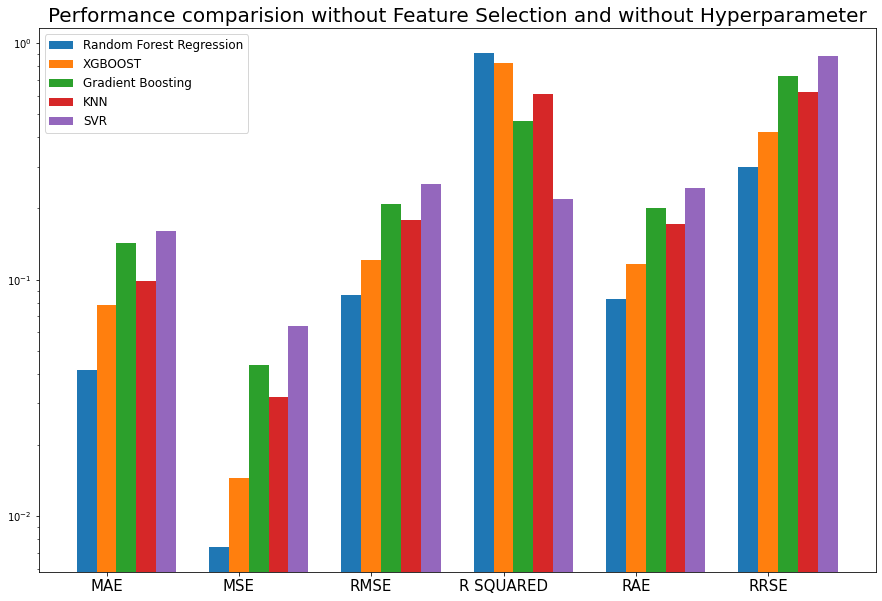

In [50]:
plt.figure(figsize=[15, 10])
X = np.arange(len(rf_index))
plt.bar(X, rf_index, color = 'tab:blue', width = 0.15)
plt.bar(X + 0.15, xgboost_index, color = 'tab:orange', width = 0.15)
plt.bar(X + 0.30, gbr_index, color = 'tab:green', width = 0.15)
plt.bar(X + 0.45, knn_index, color = 'tab:red', width = 0.15)
plt.bar(X + 0.60, svr_index, color = 'tab:purple', width = 0.15)
plt.legend(['Random Forest Regression', 'XGBOOST', 'Gradient Boosting','KNN', 'SVR'], fontsize=12)
plt.xticks([i + 0.15 for i in range(6)], ['MAE', 'MSE', 'RMSE', 'R SQUARED', 'RAE', 'RRSE'], fontsize=15)
plt.title("Performance comparision without Feature Selection and without Hyperparameter", fontsize=20)
plt.semilogy()
plt.savefig(IMAGES_PATH+"/perf_comparison1.jpg")

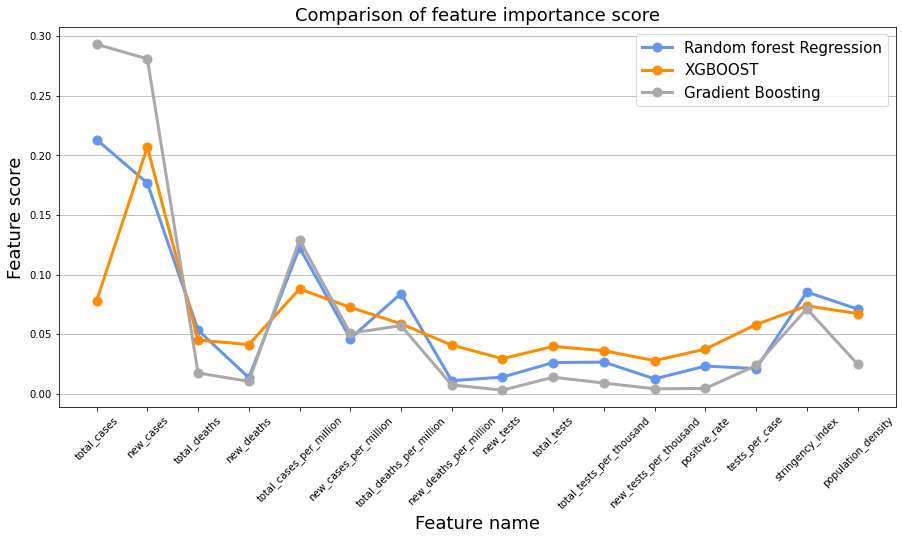

In [51]:
fig = plt.figure(figsize=(15,7))
plt.plot(X_train.columns,rf.feature_importances_,color='cornflowerblue',marker='o',linewidth=3, markersize=9)
plt.plot(X_train.columns,xgboost.feature_importances_,color='darkorange',marker='o',linewidth=3, markersize=9)
plt.plot(X_train.columns,gbr.feature_importances_,color='darkgrey',marker='o',linewidth=3, markersize=9)
plt.legend(('Random forest Regression','XGBOOST','Gradient Boosting'), fontsize=15)
plt.title('Comparison of feature importance score', fontsize=18)
plt.xlabel('Feature name', fontsize=18)
plt.ylabel('Feature score', fontsize=18)
plt.xticks(X_train.columns,rotation=45)
plt.grid(True,axis = 'y')
plt.savefig(IMAGES_PATH+"/feature_comparison1.jpg",bbox_inches ="tight",pad_inches=1.5,facecolor="white")

In [52]:
Performance_Metrics=pd.DataFrame({'Performance Metrics':['MAE','MSE','RMSE','R-Squared','RAE','RRSE'],'Random Forest':rf_index,
                          'XGBOOST':xgboost_index,'Gradient Boosting':gbr_index,'KNN':knn_index,'SVR':svr_index})

In [53]:
Performance_Metrics

Performance Metrics  Random Forest   XGBOOST  Gradient Boosting       KNN  \
0                 MAE       0.041433  0.077964           0.142516  0.098702   
1                 MSE       0.007404  0.014551           0.043575  0.031832   
2                RMSE       0.086048  0.120630           0.208746  0.178415   
3           R-Squared       0.909505  0.822149           0.467418  0.610946   
4                 RAE       0.082706  0.115945           0.200640  0.171486   
5                RRSE       0.300824  0.421724           0.729782  0.623742   

        SVR  
0  0.160069  
1  0.063910  
2  0.252805  
3  0.218875  
4  0.242987  
5  0.883813

The Random Forest performs best with the lowest MSE, RMSE, RAE, RRSE and MAE and the best R-Squared value. XGBOOST is
the next best algorithm with the second best values of all the performance metrics. The Gradient Boosting and KNN have an average performance. The SVR has the worst scores in all of the performance metrics. The lowest MAE of 0.041433 was obtained by Random Forest followed by XGBOOST with the second-best MAE of 0.077964. The SVR has the highest MAE of 0.160069. 

In [54]:
Performance_Metrics.to_csv(RESULTS_PATH+'/Performance_Metrics_1.csv')

In [55]:
feature_importances=pd.DataFrame({'Features':X_train.columns,'Feature_importance_rf':rf.feature_importances_,
                                  'Feature_importance_xgboost':xgboost.feature_importances_,
                                  'Feature_importance_gbr':gbr.feature_importances_})

In [56]:
feature_importances

Features  Feature_importance_rf  \
0                total_cases               0.213221   
1                  new_cases               0.176707   
2               total_deaths               0.053271   
3                 new_deaths               0.013452   
4    total_cases_per_million               0.122547   
5      new_cases_per_million               0.046292   
6   total_deaths_per_million               0.084031   
7     new_deaths_per_million               0.010918   
8                  new_tests               0.013902   
9                total_tests               0.026136   
10  total_tests_per_thousand               0.026515   
11    new_tests_per_thousand               0.012449   
12             positive_rate               0.023173   
13            tests_per_case               0.021055   
14          stringency_index               0.085277   
15        population_density               0.071055   

    Feature_importance_xgboost  Feature_importance_gbr  
0                     0.077927                0.293255  
1                     0.206951                0.280948  
2                     0.045020                0.017356  
3                     0.041221                0.010380  
4                     0.087896                0.128861  
5                     0.072437                0.050682  
6                     0.058650                0.057137  
7                     0.040775                0.007377  
8                     0.029388                0.002983  
9                     0.039625                0.013783  
10                    0.036095                0.008926  
11                    0.027712                0.004118  
12                    0.037393                0.004441  
13                    0.057992                0.023682  
14                    0.073706                0.071264  
15                    0.067211                0.024806

In [57]:
feature_importances.to_csv(DATA_PATH+"/feature_importances.csv")